In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Resources/tsunami.csv")

### Isolate Last 100 Years ⌚️
---

In [3]:
previous_100 = df[df['Year'] >= 1921]

In [4]:
previous_100.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,...,Tsunami Magnitude (Iida),Tsunami Intensity,Total Deaths,Total Missing,Total Missing Description,Total Injuries,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Damaged
1002,1921.0,5.0,14.0,11.0,17.0,45.0,2.0,1.0,6.2,0.0,...,NaN,0.5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1003,1921.0,8.0,4.0,NaN,NaN,NaN,3.0,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1004,1921.0,9.0,11.0,4.0,1.0,38.0,4.0,1.0,7.5,0.0,...,-2.3,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,1921.0,11.0,11.0,18.0,36.0,8.0,3.0,1.0,7.5,0.0,...,0.5,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1006,1921.0,12.0,16.0,NaN,NaN,NaN,-1.0,9.0,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Columns 😽😽😽

In [19]:
columns_drop = ['Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsunami Magnitude (Iida)', 'Total Injuries']

previous_100.drop(columns_drop, axis =1 , inplace = True)

KeyError: "['Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsunami Magnitude (Iida)'] not found in axis"

In [6]:
previous_100.isnull().sum().sort_values(ascending = False)

Total Missing                1151
Total Missing Description    1150
Total Houses Damaged         1091
Total Damage ($Mil)          1026
Total Houses Destroyed       1019
Total Injuries                908
Total Deaths                  819
Tsunami Intensity             745
Total Damage Description      608
Maximum Water Height (m)      318
Earthquake Magnitude          260
Latitude                       64
Longitude                      64
Year                            0
Tsunami Event Validity          0
Location Name                   0
Country                         0
Deposits                        0
Tsunami Cause Code              0
Number of Runups                0
dtype: int64

In [7]:
too_many_nulls = ['Total Missing', 'Total Missing Description', 'Total Houses Damaged',
                 'Total Damage ($Mil)', 'Total Houses Destroyed', 'Total Damage Description']

previous_100.drop(too_many_nulls, axis = 1, inplace = True)

***Drop all columns that have many non-nulls***

* Total Missing
* Total Missing Description
* Total Houses Damaged
* Total Damaged ($Mil)
* Total Damage Description - Can't analyze String, unless someone is a NPL (natural language processising) expert

### Must have coordinates 

In [8]:
previous_100 = previous_100[previous_100['Latitude'].notnull()]
previous_100

,Year,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Intensity,Total Deaths,Total Injuries
1002,1921.0,2.0,1.0,6.2,0.0,INDONESIA,MAKASSAR STRAIT,0.700,117.900,1.00,1.0,0.5,NaN,NaN
1003,1921.0,3.0,1.0,NaN,0.0,CHINA,"XIAOSI, DANDONG, LIAONING",40.130,124.380,NaN,0.0,NaN,NaN,NaN
1004,1921.0,4.0,1.0,7.5,0.0,INDONESIA,JAVA,-11.000,111.000,0.10,3.0,-2.0,NaN,NaN
1005,1921.0,3.0,1.0,7.5,0.0,PHILIPPINES,PHILIPPINE TRENCH,8.000,127.000,NaN,4.0,1.0,NaN,NaN
1007,1922.0,2.0,1.0,7.2,0.0,PERU,S. PERU,-16.500,-73.000,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,2021.0,4.0,1.0,7.1,0.0,PHILIPPINES,"MINDANAO ISLAND, PHILIPPINES",6.455,126.742,0.05,2.0,NaN,1.0,NaN
2158,2021.0,4.0,1.0,8.1,0.0,UK TERRITORY,SOUTHERN ATLANTIC OCEAN,-58.416,-25.321,0.64,44.0,NaN,NaN,NaN
2159,2021.0,4.0,1.0,7.2,0.0,HAITI,PORT-AU-PRINCE,18.408,-73.475,NaN,3.0,NaN,2248.0,12763.0
2160,2021.0,4.0,1.0,7.0,0.0,MEXICO,S. MEXICO,16.982,-99.773,0.48,1.0,NaN,3.0,NaN


### Replace Nulls with Column Mean 
---

If nulls is not significant, can replace with mean of non-nulls.

In [9]:
previous_100.isnull().sum().sort_values()

Year                          0
Tsunami Event Validity        0
Tsunami Cause Code            0
Deposits                      0
Country                       0
Location Name                 0
Latitude                      0
Longitude                     0
Number of Runups              0
Earthquake Magnitude        198
Maximum Water Height (m)    286
Tsunami Intensity           690
Total Deaths                763
Total Injuries              850
dtype: int64

In [10]:
# Fill Low Na Columns with Mean 
previous_100 = previous_100[previous_100['Earthquake Magnitude'].notnull()]
# previous_100['Earthquake Magnitude'] = previous_100['Earthquake Magnitude'].fillna(previous_100['Earthquake Magnitude'].mean())
#previous_100['Maximum Water Height (m)'] = previous_100['Maximum Water Height (m)'].fillna(previous_100['Maximum Water Height (m)'].mean())
previous_100 = previous_100[previous_100['Maximum Water Height (m)'].notnull()]

## Key Columns 🔑🔑🔑

1) Water Height  
2) Tsunami Intensity vs. Magnitude (Intensity v. Magnitude Ratio)  
3) Total Deaths  
4) Earthquake Magnitude


Since the key columns we want also have the most nulls, we are likely forced to delete rows with nulls.

In [11]:
intensity = previous_100[previous_100['Tsunami Intensity'].notnull()]

In [12]:
intensity.isnull().sum()

Year                          0
Tsunami Event Validity        0
Tsunami Cause Code            0
Earthquake Magnitude          0
Deposits                      0
Country                       0
Location Name                 0
Latitude                      0
Longitude                     0
Maximum Water Height (m)      0
Number of Runups              0
Tsunami Intensity             0
Total Deaths                168
Total Injuries              198
dtype: int64

In [13]:
# Fill magnitude with mean, close enough 
#intensity = intensity[intensity['Tsunami Magnitude (Iida)'].notnull()]

In [14]:
intensity.isnull().sum()

Year                          0
Tsunami Event Validity        0
Tsunami Cause Code            0
Earthquake Magnitude          0
Deposits                      0
Country                       0
Location Name                 0
Latitude                      0
Longitude                     0
Maximum Water Height (m)      0
Number of Runups              0
Tsunami Intensity             0
Total Deaths                168
Total Injuries              198
dtype: int64

In [15]:
intensity.to_csv("./Cleaned_Data_intensity.csv")
intensity

,Year,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Intensity,Total Deaths,Total Injuries
1002,1921.0,2.0,1.0,6.2,0.0,INDONESIA,MAKASSAR STRAIT,0.700,117.900,1.00,1.0,0.50,NaN,NaN
1004,1921.0,4.0,1.0,7.5,0.0,INDONESIA,JAVA,-11.000,111.000,0.10,3.0,-2.00,NaN,NaN
1010,1922.0,2.0,1.0,6.3,0.0,PHILIPPINES,CEBU ISLAND,10.200,124.100,0.70,3.0,0.00,5.0,NaN
1019,1922.0,4.0,1.0,8.7,0.0,CHILE,NORTHERN CHILE,-28.553,-70.755,9.00,36.0,2.50,700.0,NaN
1020,1922.0,3.0,1.0,6.3,0.0,NEW ZEALAND,SE. NEW ZEALAND,-43.000,173.000,0.40,3.0,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,2002.0,4.0,1.0,7.2,0.0,VANUATU,VANUATU ISLANDS,-17.600,167.856,3.00,2.0,-4.14,NaN,NaN
1877,2002.0,4.0,1.0,7.6,0.0,PAPUA NEW GUINEA,BISMARCK SEA,-3.260,142.940,5.50,88.0,1.08,4.0,70.0
1879,2002.0,1.0,1.0,7.6,0.0,INDONESIA,IRIAN JAYA,-1.757,134.297,5.00,3.0,2.82,8.0,632.0
1883,2003.0,4.0,1.0,7.5,1.0,MEXICO,S. MEXICO,18.770,-104.104,0.61,6.0,0.50,29.0,300.0


In [16]:
deaths_df = intensity[intensity['Total Deaths'].notnull()]
deaths_df.to_csv("./Cleaned_Data_deaths.csv")
deaths_df

,Year,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Intensity,Total Deaths,Total Injuries
1010,1922.0,2.0,1.0,6.3,0.0,PHILIPPINES,CEBU ISLAND,10.200,124.100,0.70,3.0,0.00,5.0,NaN
1019,1922.0,4.0,1.0,8.7,0.0,CHILE,NORTHERN CHILE,-28.553,-70.755,9.00,36.0,2.50,700.0,NaN
1026,1923.0,4.0,1.0,7.2,1.0,RUSSIA,KAMCHATKA,56.500,162.500,20.00,11.0,3.50,18.0,NaN
1034,1923.0,4.0,1.0,7.9,1.0,JAPAN,SAGAMI BAY,35.100,139.500,13.00,140.0,3.00,142807.0,47000.0
1080,1927.0,4.0,3.0,7.6,0.0,JAPAN,SW. HONSHU ISLAND,35.600,135.100,11.30,17.0,0.50,3022.0,3295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,1998.0,2.0,1.0,7.7,0.0,INDONESIA,TALIABU ISLAND,-2.071,124.891,2.75,1.0,1.00,41.0,107.0
1877,2002.0,4.0,1.0,7.6,0.0,PAPUA NEW GUINEA,BISMARCK SEA,-3.260,142.940,5.50,88.0,1.08,4.0,70.0
1879,2002.0,1.0,1.0,7.6,0.0,INDONESIA,IRIAN JAYA,-1.757,134.297,5.00,3.0,2.82,8.0,632.0
1883,2003.0,4.0,1.0,7.5,1.0,MEXICO,S. MEXICO,18.770,-104.104,0.61,6.0,0.50,29.0,300.0


## Distribution of Year
---

Looks like despite focusing on Intensity the year is more or less well distributed.. good nuff

(array([23., 20., 28., 26., 31., 46., 43., 13., 19., 36.]),
 array([1921. , 1929.2, 1937.4, 1945.6, 1953.8, 1962. , 1970.2, 1978.4,
        1986.6, 1994.8, 2003. ]),
 <BarContainer object of 10 artists>)

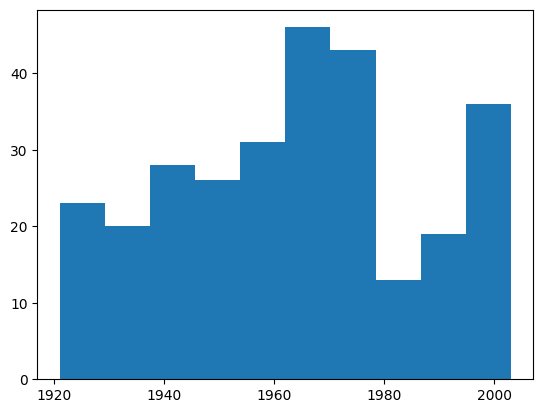

In [17]:
import matplotlib.pyplot as plt

plt.hist(intensity['Year'])

## Data Exploration 

In [18]:
import seaborn as sns 

sns.heatmap(intensity.corr())
plt.show()

ModuleNotFoundError: No module named 'seaborn'

* Looks like not a lot of colinearity - except for Deposits/Runups, Total Death/Injuries, and Magnitude v. Intensity

*Feature Engineering*
** Ratios ** Magnitude/Intensity or Death/Injries or Despoite/Runups 

In [ ]:
intensity.describe()

### Tsunami Cause Code
---

0	Unknown  
1	Earthquake  
2	Questionable Earthquake  
3	Earthquake and Landslide  
4	Volcano and Earthquake  
5	Volcano, Earthquake, and Landslide  
6	Volcano   
7	Volcano and Landslide  
8	Landslide  
9	Meteorological  
10	Explosion  
11	Astronomical Tide  